In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [2]:
df=pd.read_csv("/content/Cust_Spend_Data.csv")

In [3]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [4]:
df_1=df.drop(['Cust_ID','Name'],axis=1)

In [5]:
df_1

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [7]:
df_2=df_1.apply(zscore)

In [8]:
df_2

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


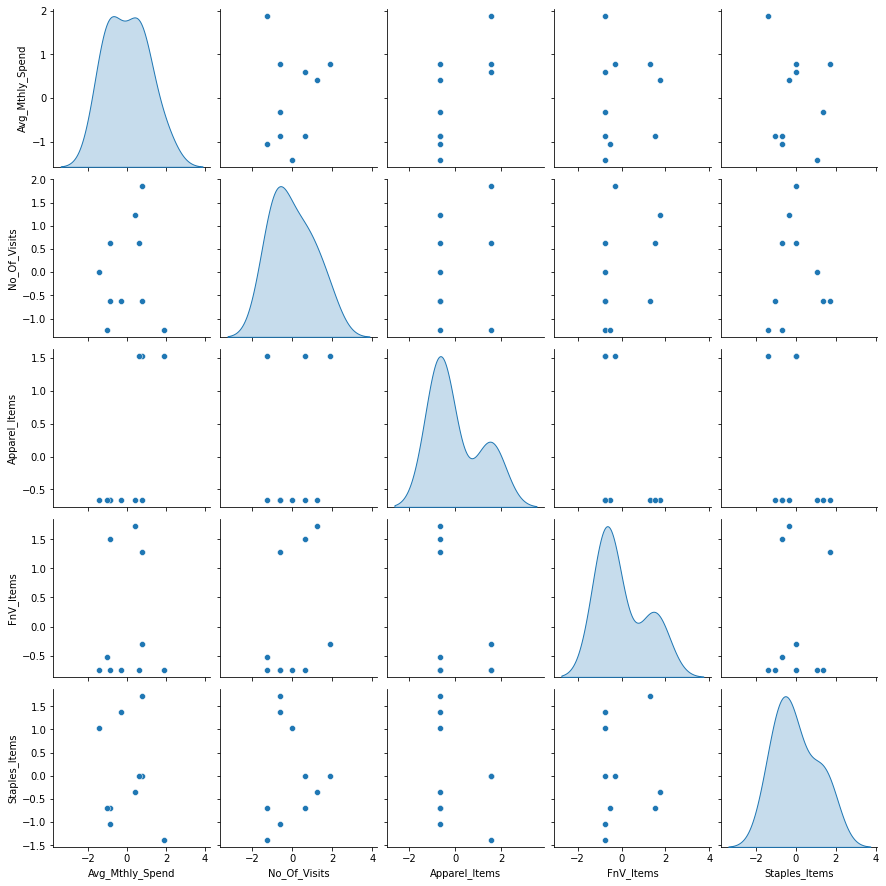

In [10]:
sns.pairplot(df_2,diag_kind='kde')

In [11]:
from sklearn.cluster  import AgglomerativeClustering

In [12]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

In [13]:
model.fit(df_2)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [15]:
df_1['labels']=model.labels_
df_1

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [16]:
df_1[df_1['labels']==0]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


In [17]:
df_1[df_1['labels']==1]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1


In [18]:
df_1[df_1['labels']==2]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
5,4000,3,0,1,8,2
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [20]:
data=df_1.groupby(['labels'])

In [22]:
data.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [26]:
from scipy.spatial.distance import pdist ## pairwise distribution between data

In [27]:
Z=linkage(df_2, metric='euclidean',method='average')

In [28]:
c,coph_dist=cophenet(Z, pdist(df_2))
c

0.8681149436293064

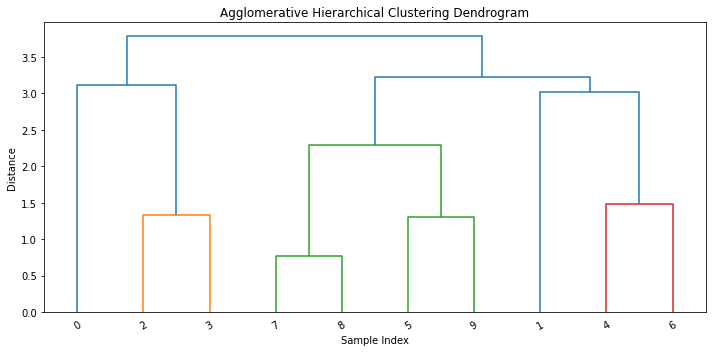

In [29]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=30,leaf_font_size=10)
plt.tight_layout()